## Project Title - Statistical Analysis on Maternal Health Risk Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
data = pd.read_csv("Statistical_Analysis_on_Maternal_Health_Risk_Data.csv")

In [4]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
data.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [6]:
data.shape

(1014, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


## Univariate Analysis

In [8]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [9]:
data2 = data[['Age'	,'SystolicBP',	'DiastolicBP'	,'BS',	'BodyTemp'	,'HeartRate']].copy()
data2

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [10]:
data2.mean()

Age             29.871795
SystolicBP     113.198225
DiastolicBP     76.460552
BS               8.725986
BodyTemp        98.665089
HeartRate       74.301775
dtype: float64

In [11]:
data2.median()

Age             26.0
SystolicBP     120.0
DiastolicBP     80.0
BS               7.5
BodyTemp        98.0
HeartRate       76.0
dtype: float64

In [12]:
data2.std()

Age            13.474386
SystolicBP     18.403913
DiastolicBP    13.885796
BS              3.293532
BodyTemp        1.371384
HeartRate       8.088702
dtype: float64

In [13]:
data2.quantile([0,0.25, 0.5, 0.75,1])

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0.00,10.0,70.0,49.0,6.0,98.0,7.0
0.25,19.0,100.0,65.0,6.9,98.0,70.0
0.50,26.0,120.0,80.0,7.5,98.0,76.0
0.75,39.0,120.0,90.0,8.0,98.0,80.0
1.00,70.0,160.0,100.0,19.0,103.0,90.0


In [14]:
correlation_matrix = data2.corr()
correlation_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


Text(0, 0.5, 'BS')

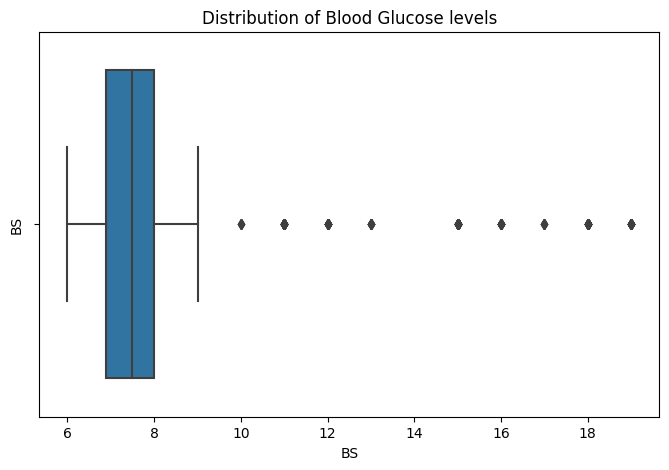

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='BS')
plt.title('Distribution of Blood Glucose levels')
plt.ylabel('BS')

In [16]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1


lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = ((data2 < (lower)) | (data2 > (upper)))

proportion_of_outliers = (outliers.sum() / len(data2)*100).rename('Proportion of Outliers')

outliers_df = pd.DataFrame(proportion_of_outliers)

# Display the DataFrame
print("Proportion of Outliers in Numerical Columns:")
print(outliers_df)

Proportion of Outliers in Numerical Columns:
             Proportion of Outliers
Age                        0.098619
SystolicBP                 0.986193
DiastolicBP                0.000000
BS                        20.710059
BodyTemp                  20.710059
HeartRate                  0.197239


In [17]:
# Define the condition
Outlier_Condition = data2['BS'] > 9

# Replace values based on the condition
data2.loc[Outlier_Condition, 'BS'] = 10

# Display the modified DataFrame
print(data2)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  10.0      98.0         86
1      35         140           90  10.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  10.0      98.0         80
1010   55         120           90  10.0      98.0         60
1011   35          85           60  10.0      98.0         86
1012   43         120           90  10.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


Text(0, 0.5, 'BS')

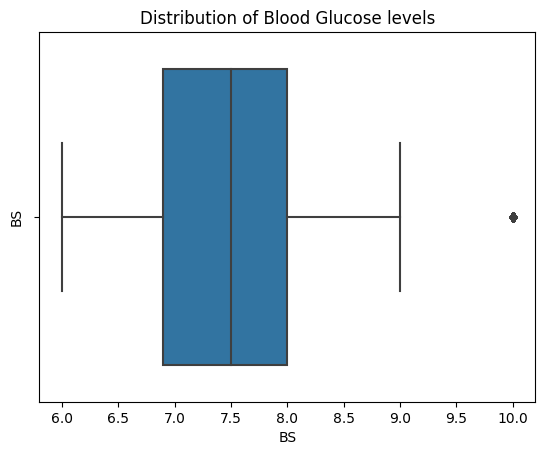

In [18]:
sns.boxplot(data=data2, x='BS')
plt.title('Distribution of Blood Glucose levels')
plt.ylabel('BS')

Text(0.5, 1.0, 'Distribution of Age')

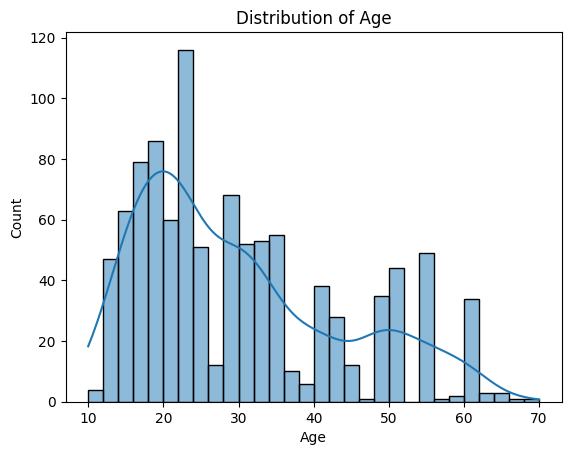

In [19]:
sns.histplot(data=data2, x='Age', bins=30 , kde=True)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of SystolicBP')

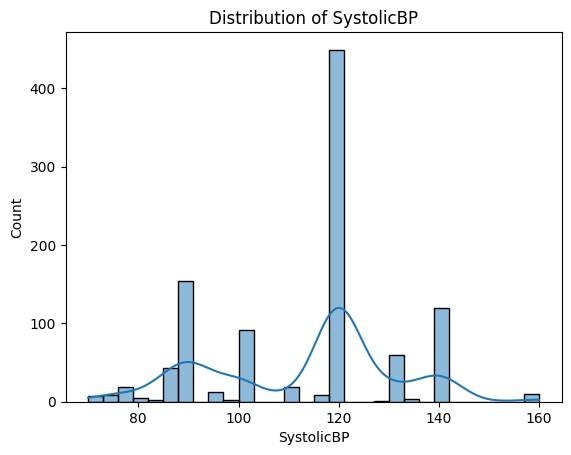

In [20]:
sns.histplot(data=data2, x='SystolicBP', bins=30 , kde=True)
plt.title('Distribution of SystolicBP')

Text(0.5, 1.0, 'Distribution of DiastolicBP')

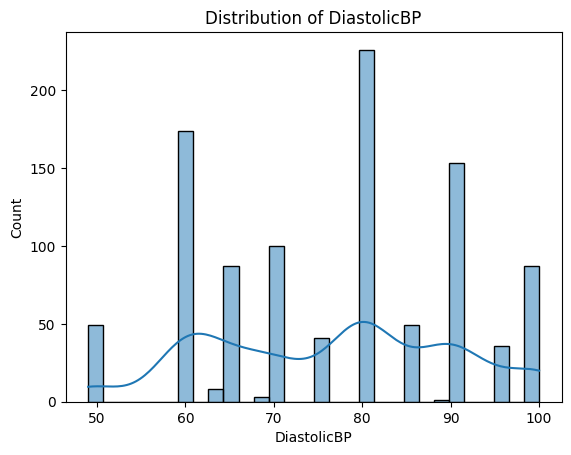

In [21]:
sns.histplot(data=data2, x='DiastolicBP', bins=30 , kde=True)
plt.title('Distribution of DiastolicBP')

Text(0.5, 1.0, 'Distribution of Blood Glucose Level')

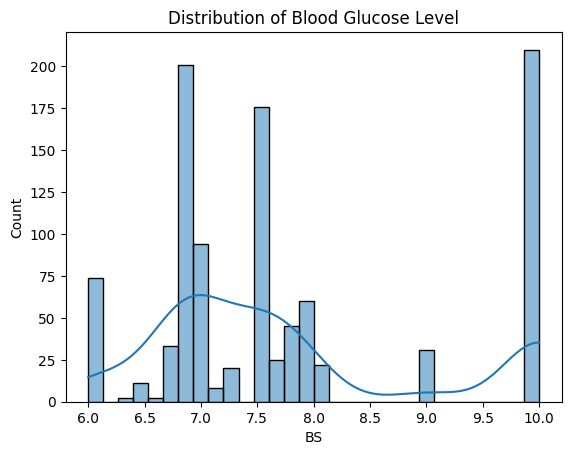

In [22]:
sns.histplot(data=data2, x='BS', bins=30 , kde=True)
plt.title('Distribution of Blood Glucose Level')

Text(0.5, 1.0, 'Distribution of Heart Beat Rate')

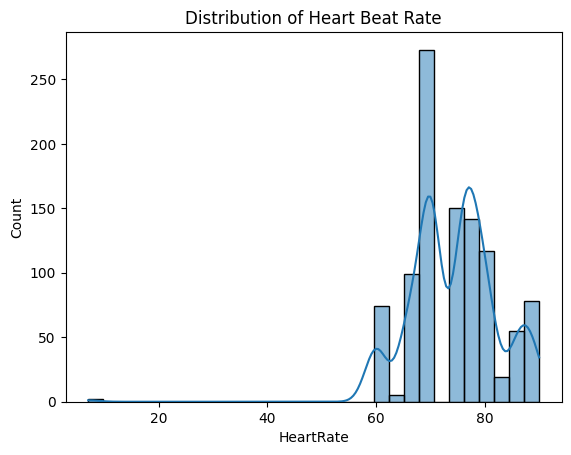

In [23]:
sns.histplot(data=data2, x='HeartRate', bins=30 , kde=True)
plt.title('Distribution of Heart Beat Rate')

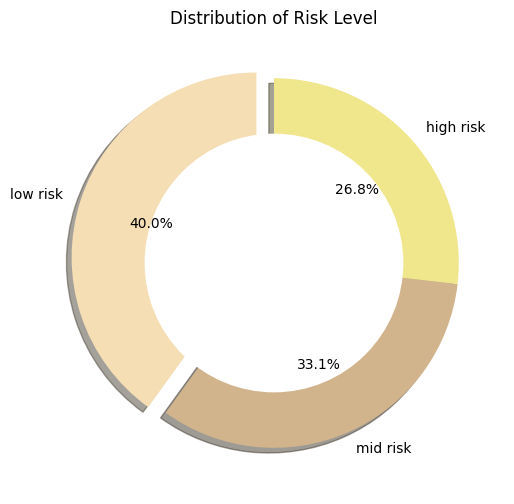

In [24]:
# Doughnut Chart for Risk Level
risk_counts = data['RiskLevel'].value_counts()


explode = (0.1, 0, 0)  # explode 1st slice for emphasis

# Plot
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(risk_counts, explode=explode, labels= risk_counts.index, autopct='%1.1f%%',shadow=True, startangle=90, colors=["Wheat", "tan", "khaki"])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Risk Level')
plt.show()

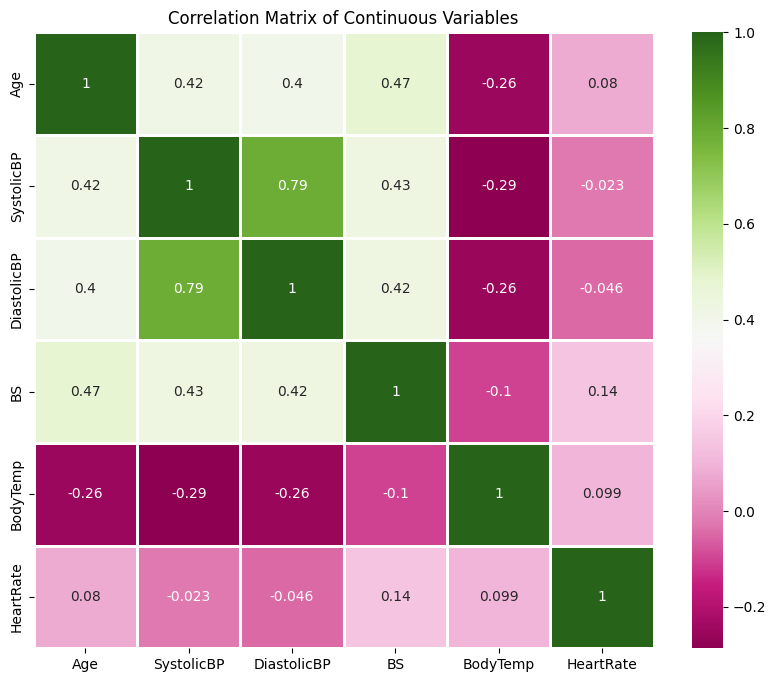

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG", linewidths=0.75, linecolor="white")
plt.title("Correlation Matrix of Continuous Variables")
plt.show()

C:\Users\VARNIKA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x400 with 0 Axes>

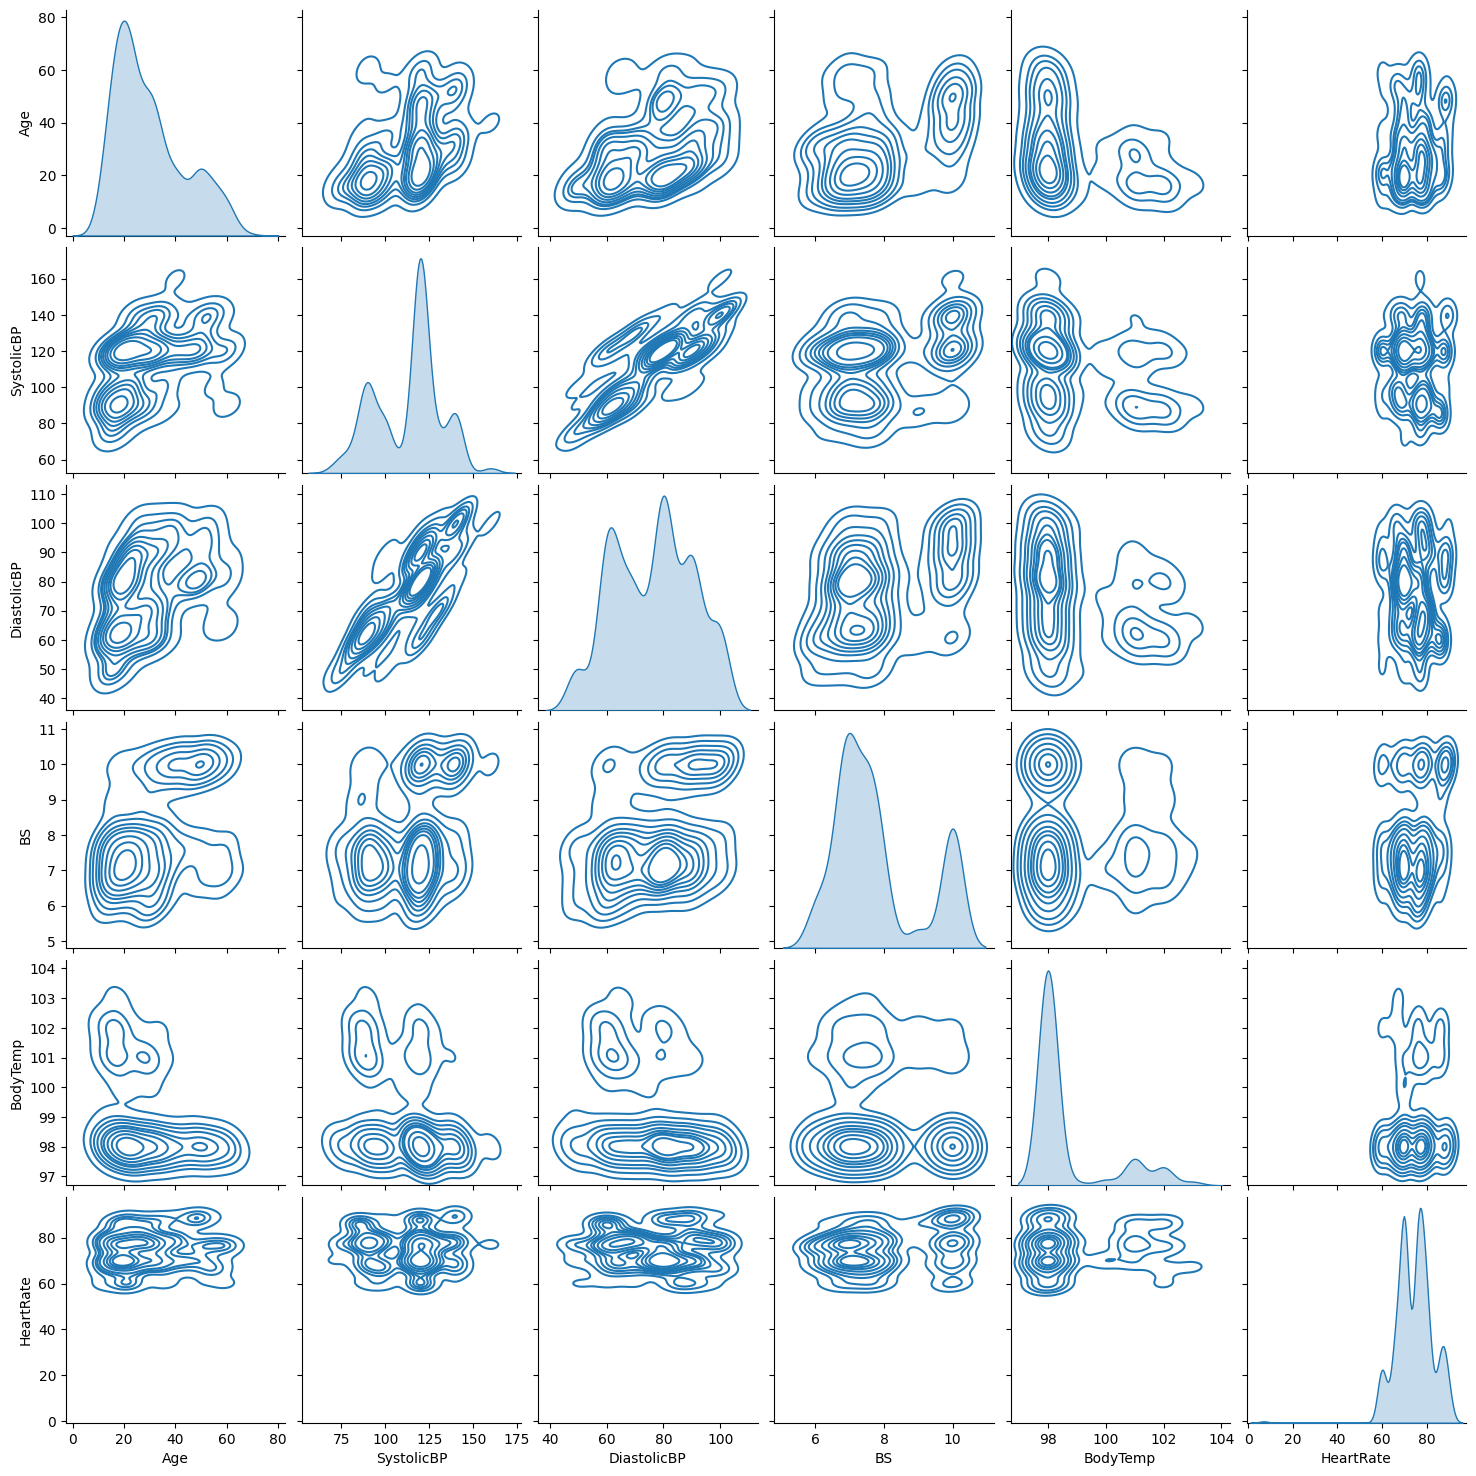

In [53]:
plt.figure(figsize=(10,4))
sns.pairplot(data2,kind="kde")
plt.show()

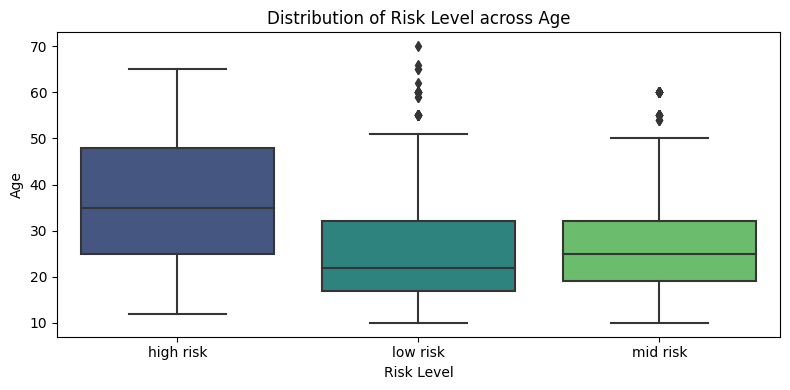

In [27]:
# Create a box plot

plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='RiskLevel', y='Age', palette='viridis')
plt.title('Distribution of Risk Level across Age')
plt.xlabel('Risk Level')
plt.ylabel('Age')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

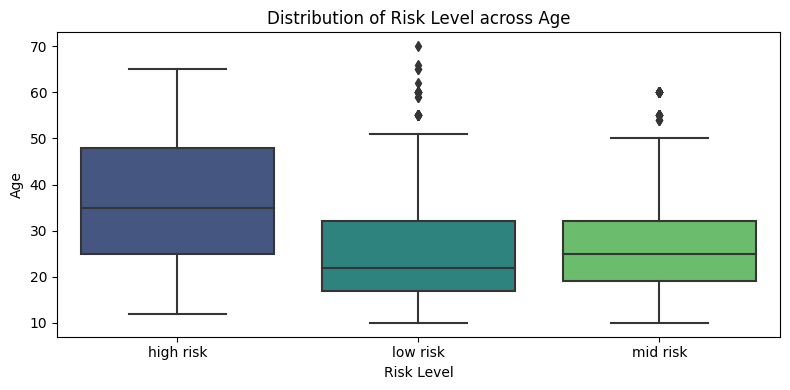

In [28]:
# Create a box plot

plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='RiskLevel', y='Age', palette='viridis')
plt.title('Distribution of Risk Level across Age')
plt.xlabel('Risk Level')
plt.ylabel('Age')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

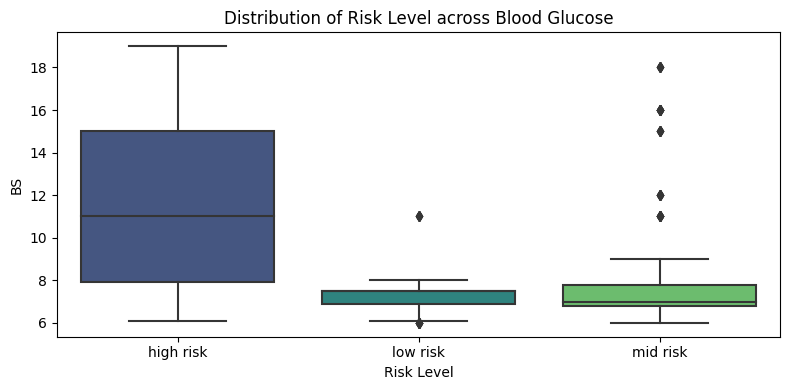

In [29]:
# Create a box plot

plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='RiskLevel', y='BS', palette='viridis')
plt.title('Distribution of Risk Level across Blood Glucose')
plt.xlabel('Risk Level')
plt.ylabel('BS')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
risk_aggregation = data.groupby('RiskLevel')[['SystolicBP', 'DiastolicBP']].mean().reset_index()
risk_aggregation

,RiskLevel,SystolicBP,DiastolicBP
0,high risk,124.194853,85.073529
1,low risk,105.866995,72.534483
2,mid risk,113.154762,74.232143


In [31]:
risk_aggregation.rename(columns={'SystolicBP': 'AvgSystolicBP', 'DiastolicBP': 'AvgDiastolicBP'}, inplace=True)
risk_aggregation

,RiskLevel,AvgSystolicBP,AvgDiastolicBP
0,high risk,124.194853,85.073529
1,low risk,105.866995,72.534483
2,mid risk,113.154762,74.232143


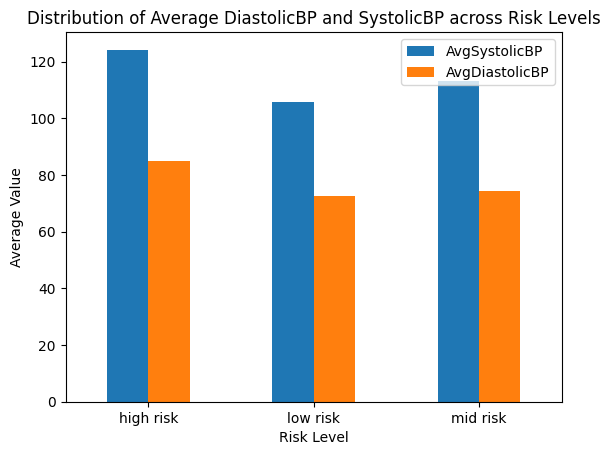

In [32]:

risk_aggregation.plot(x='RiskLevel',
        kind='bar',
        stacked=False,
        title='Distribution of Average DiastolicBP and SystolicBP across Risk Levels',rot=360)
plt.xlabel("Risk Level")
plt.ylabel("Average Value")
plt.legend(loc = 'upper right')

In [33]:
population_mean = 30

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data['Age'], population_mean)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine whether the null hypothesis is rejected based on the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")

T-Statistic: -0.3029810075384158
P-Value: 0.7619665422001746
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [34]:
population_mean = 114

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data['SystolicBP'], population_mean)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine whether the null hypothesis is rejected based on the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")

T-Statistic: -1.3872713019962495
P-Value: 0.16566417524136495
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [35]:
population_mean = 76

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data['DiastolicBP'], population_mean)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine whether the null hypothesis is rejected based on the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")

T-Statistic: 1.056153715161631
P-Value: 0.29114980274294544
Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [36]:
filter_RiskLevel = data[data['RiskLevel'].isin(['high risk', 'low risk'])]


In [37]:
filter_RiskLevel 

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1008,48,120,80,11.0,98.0,88,high risk
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk


In [38]:
high_risk = data[data['RiskLevel'] == 'high risk']['Age']
low_risk = data[data['RiskLevel'] == 'low risk']['Age']
high_risk

0       25
1       35
2       29
3       30
5       23
        ..
1008    48
1009    22
1010    55
1011    35
1012    43
Name: Age, Length: 272, dtype: int64

In [39]:
t_statistic, p_value = stats.ttest_ind(high_risk, low_risk)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine whether to reject the null hypothesis based on the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

T-Statistic: 9.11639743895195
P-Value: 8.73601200024685e-19
Reject the null hypothesis: There is a significant difference between the two groups.


In [68]:

# Separate data into two groups based on RiskLevel
high_risk_heart_rate = data[data['RiskLevel'] == 'High Risk']['HeartRate']
low_risk_heart_rate = data[data['RiskLevel'] == 'Low Risk']['HeartRate']

# Perform a two-sample F-test for Heart Rate
t_statistic, p_value = stats.levene(high_risk_heart_rate, low_risk_heart_rate)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Determine whether to reject the null hypothesis based on the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Heart Rate between High Risk and Low Risk groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Heart Rate between High Risk and Low Risk groups.")


T-Statistic: nan
P-Value: nan
Fail to reject the null hypothesis: There is no significant difference in Heart Rate between High Risk and Low Risk groups.


In [69]:
high_risk_heart_rate = data[data['RiskLevel'] == 'High Risk']['HeartRate']
low_risk_heart_rate = data[data['RiskLevel'] == 'Low Risk']['HeartRate']

In [43]:


# Separate data into two groups based on RiskLevel
high_risk_heart_rate = data[data['RiskLevel'] == 'High Risk']['HeartRate']
low_risk_heart_rate = data[data['RiskLevel'] == 'Low Risk']['HeartRate']

# Calculate the variances
variance_high_risk = high_risk_heart_rate.var()
variance_low_risk = low_risk_heart_rate.var()

# Perform a two-sample F-test for variance of Heart Rate
f_statistic = variance_high_risk / variance_low_risk

# Define the degrees of freedom
df1 = len(high_risk_heart_rate) - 1  # Degrees of freedom for high risk group
df2 = len(low_risk_heart_rate) - 1   # Degrees of freedom for low risk group

# Calculate the critical F-value for a given alpha (e.g., 0.05)
alpha = 0.05
critical_f = stats.f.ppf(1 - alpha, df1, df2)

p_value = 1 - stats.f.cdf(f_statistic, df1, df2)


print("P-value", p_value)
print("F Test Statistics", critical_f )


# Determine whether to reject the null hypothesis
if f_statistic > critical_f:
    print("Reject the null hypothesis: Variances of Heart Rate are significantly different between High Risk and Low Risk groups.")
else:
    print("Fail to reject the null hypothesis: Variances of Heart Rate are not significantly different between High Risk and Low Risk groups.")


P-value nan
F Test Statistics nan
Fail to reject the null hypothesis: Variances of Heart Rate are not significantly different between High Risk and Low Risk groups.


In [51]:

bin_edges = [60,90,120, 150,180] # Adjust bin edges as needed

column_to_bin = 'SystolicBP'

# Create custom bins and add a new column for bin labels
data['SystolicBPBins'] = pd.cut(data[column_to_bin], bins=bin_edges, right=False)

# Display the DataFrame with the new 'SystolicBPBins' column
print(data)


      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0      25         130           80  15.0      98.0         86  high risk   
1      35         140           90  13.0      98.0         70  high risk   
2      29          90           70   8.0     100.0         80  high risk   
3      30         140           85   7.0      98.0         70  high risk   
4      35         120           60   6.1      98.0         76   low risk   
...   ...         ...          ...   ...       ...        ...        ...   
1009   22         120           60  15.0      98.0         80  high risk   
1010   55         120           90  18.0      98.0         60  high risk   
1011   35          85           60  19.0      98.0         86  high risk   
1012   43         120           90  18.0      98.0         70  high risk   
1013   32         120           65   6.0     101.0         76   mid risk   

     SystolicBPBins SystolicBP_Bucket DiatolicBPBins  
0        [120, 150)    [120.0, 1

In [50]:

bin_edges = [40, 65, 90,115] # Adjust bin edges as needed

column_to_bin = 'DiastolicBP'

# Create custom bins and add a new column for bin labels
data['DiatolicBPBins'] = pd.cut(data[column_to_bin], bins=bin_edges, right=False)

# Display the DataFrame with the new 'DiatolicBPBins' column
print(data)


      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0      25         130           80  15.0      98.0         86  high risk   
1      35         140           90  13.0      98.0         70  high risk   
2      29          90           70   8.0     100.0         80  high risk   
3      30         140           85   7.0      98.0         70  high risk   
4      35         120           60   6.1      98.0         76   low risk   
...   ...         ...          ...   ...       ...        ...        ...   
1009   22         120           60  15.0      98.0         80  high risk   
1010   55         120           90  18.0      98.0         60  high risk   
1011   35          85           60  19.0      98.0         86  high risk   
1012   43         120           90  18.0      98.0         70  high risk   
1013   32         120           65   6.0     101.0         76   mid risk   

     SystolicBPBins SystolicBP_Bucket DiatolicBPBins  
0        [120, 150)    [120.0, 1

In [53]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named 'data' containing the dataset
# and 'SystolicBP' and 'DiastolicBP' are the bucketed categorical columns

# Create a contingency table (cross-tabulation) between the two categorical columns
contingency_table = pd.crosstab(data['SystolicBPBins'], data['DiatolicBPBins'])

# Perform the Chi-Square independence test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Print the Chi-Square statistic and p-value
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)

# Define the significance level (alpha)
alpha = 0.05

# Determine whether to reject the null hypothesis
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between SystolicBP and DiastolicBP.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between SystolicBP and DiastolicBP.")


Chi-Square Statistic: 497.74430787436717
P-Value: 2.574005833542086e-104
Reject the null hypothesis: There is a significant relationship between SystolicBP and DiastolicBP.


In [54]:
contingency_table

DiatolicBPBins,"[40, 65)","[65, 90)","[90, 115)"
SystolicBPBins,,,
"[60, 90)",79,5,0
"[90, 120)",119,156,12
"[120, 150)",33,346,254
"[150, 180)",0,0,10


In [ ]:
|